# <div align="center">Problem set 3</div>

#### <div align="center">Rudri Bhatt</div>

## <div align="center">Question 1</div>
#### Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.
Occupations <br>
Step 1. Import the necessary libraries  <br>
Step 2. Import the dataset from this address.  <br>
Step 3. Assign it to a variable called users <br>
Step 4. Discover what is the mean age per occupation <br>
Step 5. Discover the Male ratio per occupation and sort it from the most to the least <br>
Step 6. For each occupation, calculate the minimum and maximum ages <br>
Step 7. For each combination of occupation and sex, calculate the mean age <br>
Step 8. For each occupation present the percentage of women and men <br>

In [2]:
import pandas as pd

In [3]:
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')


In [4]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### Step 4. Discover what is the mean age per occupation

In [5]:
grouped_occupation = users.groupby("occupation")
mean_occupation = grouped_occupation.age.mean()
#mean_occupation = mean_occupation.reset_index()
print(mean_occupation)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


### Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [6]:

def gender_binary(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0

users['gender_b'] = users['gender'].apply(gender_binary)


ratio = users.groupby('occupation').gender_b.sum() / users.occupation.value_counts() * 100 

ratio.sort_values(ascending = False)


doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

### Step 6. For each occupation, calculate the minimum and maximum ages

In [7]:

users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


#### Step 7. For each combination of occupation and sex, calculate the mean age

In [8]:
x=users.groupby(['occupation','gender'])['age'].agg(['min', 'max'])
print(x)

                      min  max
occupation    gender          
administrator F        22   62
              M        21   70
artist        F        19   48
              M        20   45
doctor        M        28   64
educator      F        23   51
              M        25   63
engineer      F        23   36
              M        22   70
entertainment F        24   38
              M        15   50
executive     F        39   49
              M        22   69
healthcare    F        22   53
              M        28   62
homemaker     F        20   50
              M        23   23
lawyer        F        28   51
              M        21   53
librarian     F        26   59
              M        23   69
marketing     F        24   50
              M        24   55
none          F        26   55
              M        11   33
other         F        18   55
              M        13   64
programmer    F        26   38
              M        20   63
retired       F        70   70
        

### Step 8. For each occupation present the percentage of women and men

In [9]:
x = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
y = users.groupby(['occupation']).agg('count')
occup_gender = x.div(y, level = "occupation") * 100
occup_gender.loc[: , 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# <div align="center">Question 2</div>
Euro Teams<br>
Step 1. Import the necessary libraries<br>
Step 2. Import the dataset from this address<br>
Step 3. Assign it to a variable called euro12<br>
Step 4. Select only the Goal column<br>
Step 5. How many team participated in the Euro2012?<br>
Step 6. What is the number of columns in the dataset?<br>
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline<br>
Step 8. Sort the teams by Red Cards, then to Yellow Cards<br>
Step 9. Calculate the mean Yellow Cards given per Team<br>
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G<br>
Step 12. Select the first 7 columns<br>
Step 13. Select all columns except the last 3<br>
Step 14. Present only the Shooting Accuracy from England, Italy and Russia<br>

In [10]:
import pandas as pd
import numpy as np

euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')#, sep=',', header=None, names=euro12_columns)
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

### Step 5. How many team participated in the Euro2012?<br>

In [11]:
print("number of teams participated", euro12.shape[0])

number of teams participated 16


### Step 6. What is the number of columns in the dataset?

In [12]:
print("Total number of columns: ", euro12.shape[1])

Total number of columns:  35


### Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [13]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


### Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [14]:
Sort_Yellow_Card = discipline.sort_values(by = 'Yellow Cards')
Sort_Red_Card = discipline.sort_values(by = 'Red Cards')
print(Sort_Yellow_Card)

print(Sort_Red_Card)


                   Team  Yellow Cards  Red Cards
2               Denmark             4          0
5               Germany             4          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
4                France             6          0
11  Republic of Ireland             6          1
12               Russia             6          0
1        Czech Republic             7          0
9                Poland             7          1
14               Sweden             7          0
0               Croatia             9          0
6                Greece             9          1
13                Spain            11          0
10             Portugal            12          0
7                 Italy            16          0
                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denm

### Step 9. Calculate the mean Yellow Cards given per Team

In [15]:
mean_yellow=euro12["Yellow Cards"].mean()
print(mean_yellow)

7.4375


### Step 10. Filter teams that scored more than 6 goals

In [16]:
Team_Goals = euro12.loc[:,'Team':'Goals']
goal_6 = Team_Goals[Team_Goals["Goals"] >= 6]
#print(goal_6)
goal_6

,Team,Goals
5,Germany,10
7,Italy,6
10,Portugal,6
13,Spain,12


### Step 11. Select the teams that start with G

In [17]:
euro12[euro12.Team.str.startswith("G")] # using numpy book reference

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


### Step 12. Select the first 7 columns

In [18]:
euro12.iloc[ :,0:7 ]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


### Step 13. Select all columns except the last 3

In [19]:
 euro12.iloc[: , :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


### Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [20]:
shooting_accuracy_team = euro12.loc[:,['Team','Shooting Accuracy']]
shooting_accuracy_state = shooting_accuracy_team.loc[[3,7,12],:]
shooting_accuracy_state

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# <div align="center">Question 3</div>
## Housing
Step 1. Import the necessary libraries<br>
Step 2. Create 3 differents Series, each of length 100, as follows:<br>
• The first a random number from 1 to 4 <br>
• The second a random number from 1 to 3 <br>
• The third a random number from 10,000 to 30,000 <br>
Step 3. Create a DataFrame by joinning the Series by column <br>
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter<br>
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'<br>
Step 6. Ops it seems it is going only until index 99. Is it true?<br>
Step 7. Reindex the DataFrame so it goes from 0 to 299<br>

In [21]:
import pandas as pd
import numpy as np
import random

A = pd.Series(np.random.randint(1,5,100))
B = pd.Series(np.random.randint(1,4,100))
C = pd.Series(np.random.randint(10000,30000,100))

Allseries = pd.DataFrame({'A':A, 'B': B, 'C' :C})
Allseries.head()


,A,B,C
0,4,3,10216
1,3,3,28972
2,2,3,21082
3,1,1,24714
4,2,2,18415


### Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Taken reference from link 
https://github.com/justmarkham/pandas-videos/blob/master/pandas_changes.ipynb

In [22]:
Allseries.rename({'A':'bedrs', 'B':'bathrs', 'C':'price_sqr_meter'}, axis='columns').head()

,bedrs,bathrs,price_sqr_meter
0,4,3,10216
1,3,3,28972
2,2,3,21082
3,1,1,24714
4,2,2,18415


### Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [23]:
bigcolumn = pd.concat([A,B,C],axis=0)
bigcolumn

#BigColumnBF = pd.DataFrame()
#BigColumn['bigcolumn'] = Allseries['bedrs'].append(Allseries['bathrs']).append(Allseries['price_sqr_meter']).reset_index(drop=True)
#BigColumn.head()

0         4
1         3
2         2
3         1
4         2
      ...  
95    26277
96    24367
97    15930
98    27200
99    10575
Length: 300, dtype: int32

### Step 6. Ops it seems it is going only until index 99. Is it true?

In [24]:
len(bigcolumn)

#bigcolumn.shape[0]

300

### Step 7. Reindex the DataFrame so it goes from 0 to 299
reference
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html

In [25]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

0          4
1          3
2          2
3          1
4          2
       ...  
295    26277
296    24367
297    15930
298    27200
299    10575
Length: 300, dtype: int32

# Question 4
Wind Statistics<br>
The data have been modified to contain some missing values, identified by NaN.<Br>
Using pandas should make this exercise easier, in particular for the bonus question.<Br>
You should be able to perform all of these operations without using a for loop or other looping construct.<Br>
The data in 'wind.data' has the following format:<Br>
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL<Br>
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04<Br>
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83<Br>
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71<Br>

The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.<Br>
Step 1. Import the necessary libraries<Br>
Step 2. Import the dataset from this address<Br>
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.<Br>


In [26]:
import pandas as pd
import numpy as np
import datetime

data=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data',sep="\s+",parse_dates=[[0,1,2]])
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.


In [27]:
def function(x):
    year=1961 if x.year == 2061 else x.year
    return datetime.date(year,x.month,x.day)

data['Yr_Mo_Dy']=data['Yr_Mo_Dy'].apply(function)
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


### Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].


In [28]:
data['Yr_Mo_Dy']=pd.to_datetime(data['Yr_Mo_Dy'])
data=data.set_index('Yr_Mo_Dy')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


### Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.


In [29]:
missingvalues=data.isnull().sum()
missingvalues

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

### Step 7. Compute how many non-missing values there are in total.


In [30]:
data.shape[0]-missingvalues

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. 


In [31]:
Mn_all_location= data.mean()
Mn_all_location.mean()

10.227982360836924

##### A single number for the entire dataset
### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days


In [32]:
loc_stats=pd.DataFrame()
data.agg(['min','max','mean','std'])

loc_stats=pd.DataFrame()
loc_stats['min']=data.min()
loc_stats['max']=data.max()
loc_stats['mean']=data.mean()
loc_stats['std']=data.std()
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


##### A different set of numbers for each location.
### Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.


In [33]:
day_stats=pd.DataFrame()
day_stats['min']=data.min(axis=1)
day_stats['max']=data.max(axis=1)
day_stats['mean']=data.mean(axis=1)
day_stats['std']=data.std(axis=1)
day_stats

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


##### A different set of numbers for each day.
### Step 11. Find the average windspeed in January for each location.


In [34]:
data['date']=data.index
data['month']=data['date'].apply(lambda date:date.month)
data['year']=data['date'].apply(lambda date:date.year)
data['day']=data['date'].apply(lambda date:date.day)
january_data=data.query('month==1')
january_data
january_data.loc[:,'RPT':'MAL'].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

##### Treat January 1961 and January 1962 both as January.
### Step 12. Downsample the record to a yearly frequency for each location.


In [35]:
data.query('month == 1 and day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1,1961,1
2062-01-01,9.29,3.42,11.54,3.50,2.21,1.96,10.41,2.79,3.54,5.17,4.38,7.92,2062-01-01,1,2062,1
2063-01-01,15.59,13.62,19.79,8.38,12.25,10.00,23.45,15.71,13.59,14.37,17.58,34.13,2063-01-01,1,2063,1
2064-01-01,25.80,22.13,18.21,13.25,21.29,14.79,14.12,19.58,13.25,16.75,28.96,21.00,2064-01-01,1,2064,1
2065-01-01,9.54,11.92,9.00,4.38,6.08,5.21,10.25,6.08,5.71,8.63,12.04,17.41,2065-01-01,1,2065,1
2066-01-01,22.04,21.50,17.08,12.75,22.17,15.59,21.79,18.12,16.66,17.83,28.33,23.79,2066-01-01,1,2066,1
2067-01-01,6.46,4.46,6.50,3.21,6.67,3.79,11.38,3.83,7.71,9.08,10.67,20.91,2067-01-01,1,2067,1
2068-01-01,30.04,17.88,16.25,16.25,21.79,12.54,18.16,16.62,18.75,17.62,22.25,27.29,2068-01-01,1,2068,1
2069-01-01,6.13,1.63,5.41,1.08,2.54,1.00,8.50,2.42,4.58,6.34,9.17,16.71,2069-01-01,1,2069,1


### Step 13. Downsample the record to a monthly frequency for each location.


In [36]:
data.query('day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1,1961,1
1961-02-01,14.25,15.12,9.04,5.88,12.08,7.17,10.17,3.63,6.50,5.50,9.17,8.00,1961-02-01,2,1961,1
1961-03-01,12.67,13.13,11.79,6.42,9.79,8.54,10.25,13.29,NaN,12.21,20.62,NaN,1961-03-01,3,1961,1
1961-04-01,8.38,6.34,8.33,6.75,9.33,9.54,11.67,8.21,11.21,6.46,11.96,7.17,1961-04-01,4,1961,1
1961-05-01,15.87,13.88,15.37,9.79,13.46,10.17,9.96,14.04,9.75,9.92,18.63,11.12,1961-05-01,5,1961,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-01,19.33,15.09,20.17,8.83,12.62,10.41,9.33,12.33,9.50,9.92,15.75,18.00,1978-08-01,8,1978,1
1978-09-01,8.42,6.13,9.87,5.25,3.21,5.71,7.25,3.50,7.33,6.50,7.62,15.96,1978-09-01,9,1978,1
1978-10-01,9.50,6.83,10.50,3.88,6.13,4.58,4.21,6.50,6.38,6.54,10.63,14.09,1978-10-01,10,1978,1


### Step 14. Downsample the record to a weekly frequency for each location.


In [37]:
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000,1.0,1961.0,1.0
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571,1.0,1961.0,5.0
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286,1.0,1961.0,12.0
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286,1.0,1961.0,19.0
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000,1.0,1961.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070-12-01/2070-12-07,13.845714,12.410000,11.631429,6.368571,13.011429,8.680000,11.737143,9.368571,11.088571,10.468571,16.641429,21.184286,12.0,2070.0,4.0
2070-12-08/2070-12-14,11.870000,8.447143,11.720000,4.150000,8.625714,5.311429,5.488571,5.547143,5.648571,4.168571,8.370000,12.934286,12.0,2070.0,11.0
2070-12-15/2070-12-21,11.605714,9.981429,12.400000,5.404286,9.630000,7.090000,8.308571,7.442857,8.232857,8.930000,12.392857,18.548571,12.0,2070.0,18.0


### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [41]:
each_week = data.resample('W').agg(['min','max','mean','std'])
each_week.loc[each_week.index[1:53], "RPT":"MAL"] .head(10)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Yr_Mo_Dy                            ...                                      
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-29  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   
1961-02-12  3.608373  13.67  21.34  ...  14.440000  1.746749  15.21  26.38   
1961-02-19  3.575012   6.13  19.41  ...  13.542857  2.531361  14.09  29.63   
1961-02-26  5.147348   6.08  22.42  ...  12.730000  4.920064   9.59  23.21   
1961-03-05  2.851955   8.17  13.67  ...  12.370000  1.593685  11.58  23.45   
1961-03-12  3.230167   7.54  16.38  ...  10.458571  3.655113  10.21  22.71   

                                   MAL                              
                 mean       std    min    max       mean       std  
Yr_Mo_Dy                                                            
1961-01-08  12.481429  4.349139  10.88  16.46  13.238571  1.773062  
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.821429  3.626584   6.79  17.96  11.434286  4.237239  
1961-01-29  20.930000  5.210726  17.50  27.63  22.530000  3.874721  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  
1961-02-12  21.832857  4.063753  17.04  21.84  19.155714  1.828705  
1961-02-19  21.167143  5.910938  10.96  22.58  16.584286  4.685377  
1961-02-26  16.304286  5.091162   6.67  23.87  14.322857  6.182283  
1961-03-05  17.842857  4.332331   8.83  17.54  13.951667  3.021387  
1961-03-12  16.701429  4.358759   5.54  22.54  14.420000  5.769890  

[10 rows x 48 columns]

# <div align="center">Question 5</div>
Step 1. Import the necessary libraries <br>
Step 2. Import the dataset from this address.<br>
Step 3. Assign it to a variable called chipo.<br>
Step 4. See the first 10 entries<br>
Step 5. What is the number of observations in the dataset?<br>
Step 6. What is the number of columns in the dataset?<br>
Step 7. Print the name of all the columns.<br>
Step 8. How is the dataset indexed?<br>
Step 9. Which was the most-ordered item?<br>
Step 10. For the most-ordered item, how many items were ordered?<br>
Step 11. What was the most ordered item in the choice_description column?<br>
Step 12. How many items were orderd in total?<br>
Step 13.<br>
• Turn the item price into a float<br>
• Check the item price type<br>
• Create a lambda function and change the type of item price<br>
• Check the item price type<br>
Step 14. How much was the revenue for the period in the dataset?<br>
Step 15. How many orders were made in the period?<br>
Step 16. What is the average revenue amount per order?<br>
Step 17. How many different items are sold?<br>

In [42]:
import pandas as pd
import numpy as np

chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [43]:
chipo.shape[0]

4622

### Step 6. What is the number of columns in the dataset?

In [44]:
chipo.shape[1]

5

### Step 7. Print the name of all the columns.<br>

In [45]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### Step 8. How is the dataset indexed?

In [46]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most-ordered item?
### Step 10. For the most-ordered item, how many items were ordered?

In [47]:
#chipo.item_name.value_counts().head(1)
chipo.groupby(['item_name']).sum().sort_values('quantity', ascending= False).head(1)



,order_id,quantity
item_name,,
Chicken Bowl,713926,761


### Step 11. What was the most ordered item in the choice_description column?

In [48]:
chipo.choice_description.value_counts().head(1)
chipo.quantity.sum()

4972

### Step 12. How many items were orderd in total?

In [49]:
#chipo.quantity.sum()
topitem=chipo.groupby(['item_name']).sum()
topitem[['quantity']].sum()

quantity    4972
dtype: int64

### Step 13.<br>
• Turn the item price into a float<br>
• Check the item price type<br>
• Create a lambda function and change the type of item price<br>
• Check the item price type<br>

In [50]:
#stringchipo = chipo['item_price'].str.replace('$','', regex=True)
def turn(x):
    return float(x[1:-2])
chipo.item_price = chipo.item_price.apply(turn)
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.3
1,1,1,Izze,[Clementine],3.3
2,1,1,Nantucket Nectar,[Apple],3.3
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.3
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.9
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.7
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.7
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.2
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.7


In [51]:
chipo.item_price

0        2.3
1        3.3
2        3.3
3        2.3
4       16.9
        ... 
4617    11.7
4618    11.7
4619    11.2
4620     8.7
4621     8.7
Name: item_price, Length: 4622, dtype: float64

In [52]:
chipo.item_price.dtypes

dtype('float64')

### Step 14. How much was the revenue for the period in the dataset?

In [53]:
revenue=chipo.item_price.sum()
revenue

34231.5

### Step 15. How many orders were made in the period?<br>

In [54]:
chipo.order_id.value_counts().count()

1834

### Step 16. What is the average revenue amount per order?

In [55]:
revenue.mean()

34231.5

### Step 17. How many different items are sold?

In [56]:
topitem.shape[0]

50

# <div align="center">Question 6</div>
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your ax

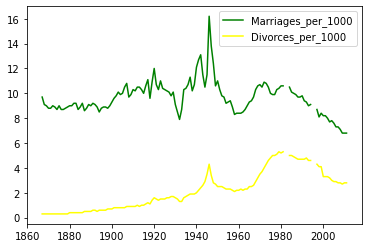

In [61]:
import pandas as pd
import matplotlib.pyplot as pp
%matplotlib inline

us_mrg_div = pd.read_csv('us-marriages-divorces-1867-2014.csv')
x_axes = us_mrg_div['Year']
y_axes = us_mrg_div['Marriages_per_1000']
z_axes = us_mrg_div['Divorces_per_1000']
pp.plot(x_axes, y_axes,color="green")
pp.plot(x_axes, z_axes,color="Yellow")

pp.legend(['Marriages_per_1000','Divorces_per_1000'])

# <div align="center">Question 7</div>
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

<AxesSubplot:title={'center':'Comparison of 1900, 1950, 2000'}, xlabel='Year'>

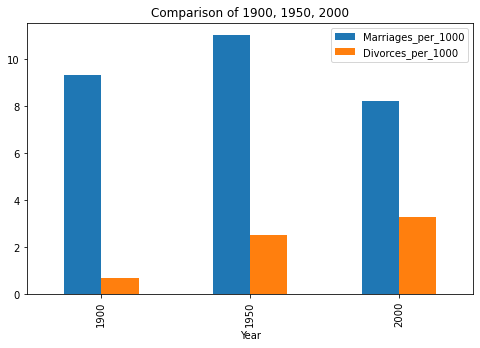

In [5]:
import pandas as pd
import matplotlib.pyplot as pp
%matplotlib inline

us_mrg_div = pd.read_csv('us-marriages-divorces-1867-2014.csv')
us_mrg_div.set_index('Year', inplace = True)

barplot = us_mrg_div.loc[[1900,1950,2000],['Marriages_per_1000','Divorces_per_1000']]
barplot.plot.bar(title="Comparison of 1900, 1950, 2000",figsize=(8,5))

# <div align="center">Question 8</div> 
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

Text(0.5, 0, 'Kills by Actor')

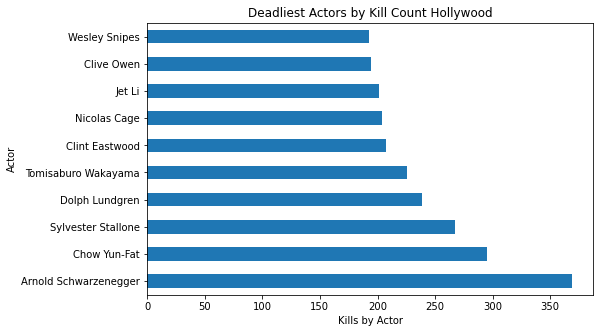

In [4]:
import pandas as pd
import matplotlib.pyplot as pp
%matplotlib inline

actors = pd.read_csv('actor_kill_counts.csv')
ActorsinHollywood = actors.sort_values(by='Count',ascending=False)
ActorsinHollywood.set_index('Actor', inplace=True)
ActorsinHollywood['Count'].plot.barh(title='Deadliest Actors by Kill Count Hollywood',figsize=(8,5))
pp.xlabel("Kills by Actor", size=10)

# <div align="center">Question 9</div>
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.



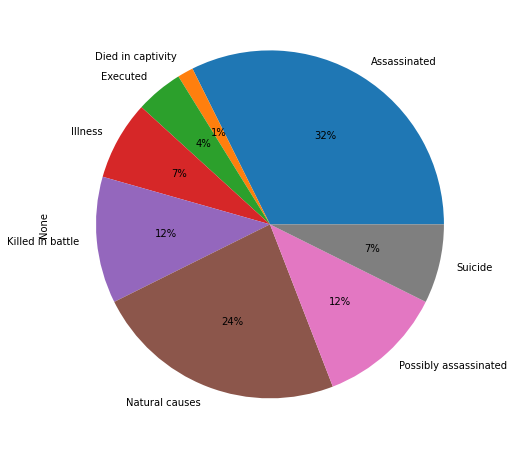

In [63]:
import matplotlib.pyplot as pp

Roma = pd.read_csv('roman-emperor-reigns.csv')
y = Roma.groupby(['Cause_of_Death']).size()
#plt.legend(title = "Death Cause:")
y.plot.pie(autopct="%.0f%%",figsize=(20,8));

 #reference taken from w3schools

# <div align="center">Question 10</div>
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.



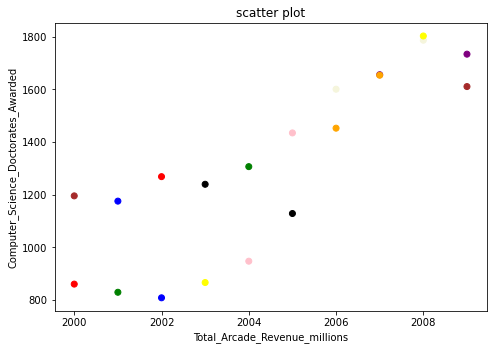

In [65]:
import matplotlib.pyplot as pp
import numpy as np

arcade = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
arcade.columns = ['Year','Total_Arcade_Revenue_millions', 'Computer_Science_Doctorates_Awarded']
arcade['Total_Arcade_Revenue_millions'] = arcade['Total_Arcade_Revenue_millions'].apply(lambda x: x *1000).astype('int')


x = arcade['Year']
y = arcade['Computer_Science_Doctorates_Awarded']
z = arcade['Total_Arcade_Revenue_millions']
colors1 = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown"])
colors2 =np.array(["brown","blue","red","black","green","pink","beige","orange","yellow","purple"])
#pp.scatter(x, y,c=colors)

#pp.show()
fig=pp.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x, y, color=colors1)
ax.scatter(x, z, color=colors2)
ax.set_xlabel('Total_Arcade_Revenue_millions')
ax.set_ylabel('Computer_Science_Doctorates_Awarded')
ax.set_title('scatter plot')
pp.show()

#reference taken from w3schools and stackoverflow.
